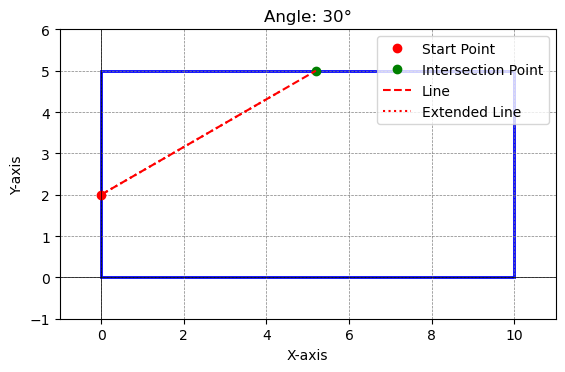

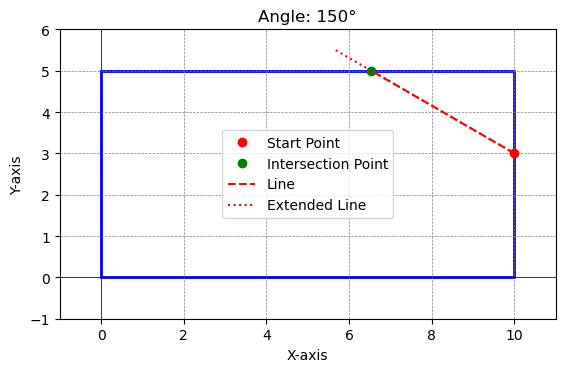

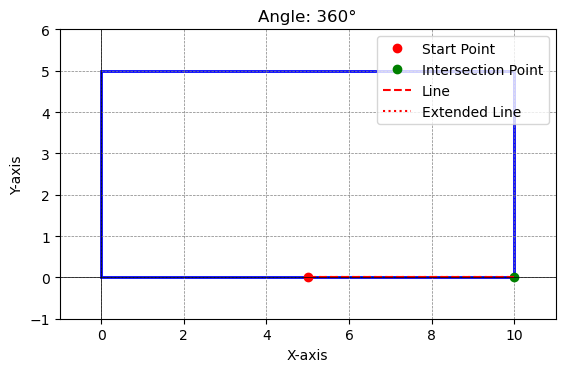

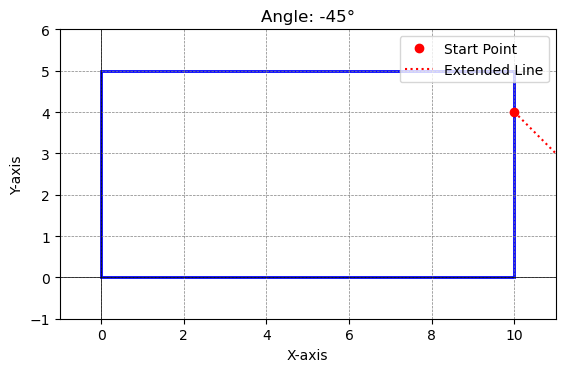

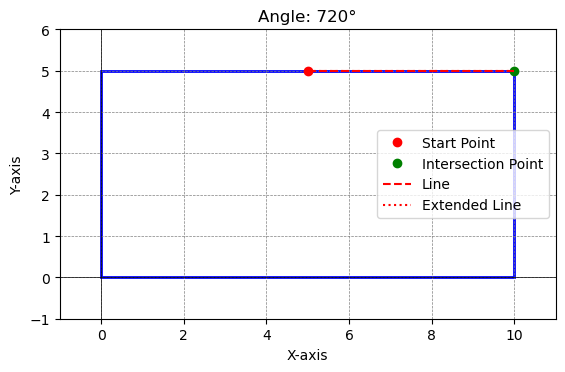

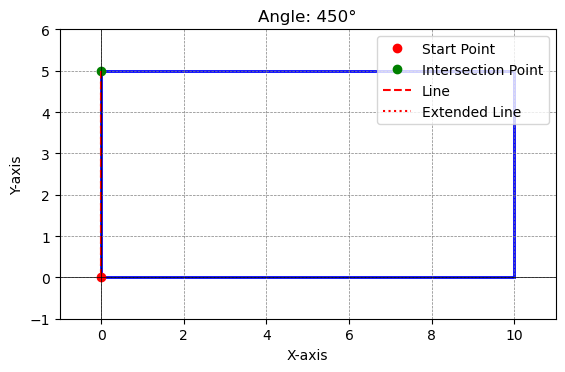

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_angle(angle):
    """ Normalize the angle to be within the range [0, 360). """
    return angle % 360

def intersect_rectangle(L, W, start_point, angle):
    x0, y0 = start_point
    angle = normalize_angle(angle)
    theta_radians = np.radians(angle)

    delta_x = np.cos(theta_radians)
    delta_y = np.sin(theta_radians)

    intersection = None

    # Intersect with the left side (x = 0)
    if delta_x != 0:
        t_left = -x0 / delta_x
        if t_left >= 0:
            y_left = y0 + t_left * delta_y
            if 0 <= y_left <= W and (0, y_left) != start_point:
                intersection = (0, y_left)

    # Intersect with the right side (x = L)
    if delta_x != 0:
        t_right = (L - x0) / delta_x
        if t_right >= 0:
            y_right = y0 + t_right * delta_y
            if 0 <= y_right <= W and (L, y_right) != start_point:
                if intersection is None or t_right < t_left:
                    intersection = (L, y_right)

    # Intersect with the bottom side (y = 0)
    if delta_y != 0:
        t_bottom = -y0 / delta_y
        if t_bottom >= 0:
            x_bottom = x0 + t_bottom * delta_x
            if 0 <= x_bottom <= L and (x_bottom, 0) != start_point:
                if intersection is None or t_bottom < min(t_left, t_right):
                    intersection = (x_bottom, 0)

    # Intersect with the top side (y = W)
    if delta_y != 0:
        t_top = (W - y0) / delta_y
        if t_top >= 0:
            x_top = x0 + t_top * delta_x
            if 0 <= x_top <= L and (x_top, W) != start_point:
                if intersection is None or t_top < min(t_left, t_right):
                    intersection = (x_top, W)

    return intersection, delta_x, delta_y

def plot_rectangle_and_line(L, W, start_point, angle):
    intersection, delta_x, delta_y = intersect_rectangle(L, W, start_point, angle)

    # Create figure and axis
    fig, ax = plt.subplots()

    # Draw rectangle
    rectangle = plt.Rectangle((0, 0), L, W, fill=None, edgecolor='blue', linewidth=2)
    ax.add_patch(rectangle)

    # Plot start point
    ax.plot(start_point[0], start_point[1], 'ro', label='Start Point')

    # Plot intersection point
    if intersection:
        ax.plot(intersection[0], intersection[1], 'go', label='Intersection Point')

        # Draw line from start point to intersection point
        ax.plot([start_point[0], intersection[0]], [start_point[1], intersection[1]], 'r--', label='Line')

    # Extend line visualization for angle direction
    line_extension = 5  # Length of the extended line
    line_x = [start_point[0], start_point[0] + delta_x * line_extension]
    line_y = [start_point[1], start_point[1] + delta_y * line_extension]
    ax.plot(line_x, line_y, 'r:', label='Extended Line')

    # Configure plot limits and labels
    ax.set_xlim(-1, L + 1)
    ax.set_ylim(-1, W + 1)
    ax.set_aspect('equal', adjustable='box')
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    ax.set_title(f'Angle: {angle}°')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()

    plt.show()

# Example scenarios with angles that wrap around
examples = [
    (10, 5, (0, 2), 30),     # Normal angle
    (10, 5, (10, 3), 150),   # Normal angle
    (10, 5, (5, 0), 360),    # 360 degrees (same direction as 0)
    (10, 5, (10, 4), -45),   # Negative angle
    (10, 5, (5, 5), 720),    # 720 degrees (full rotation)
    (10, 5, (0, 0), 450),    # 450 degrees
]

for L, W, start_point, angle in examples:
    plot_rectangle_and_line(L, W, start_point, angle)


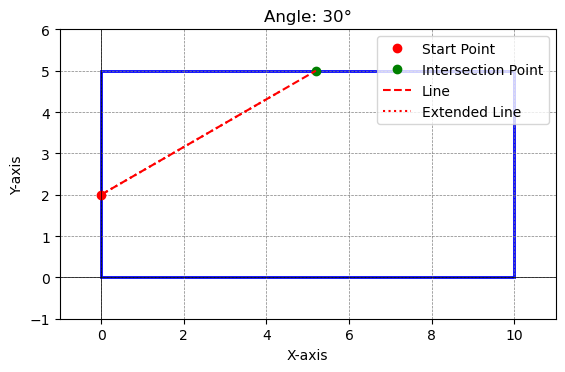

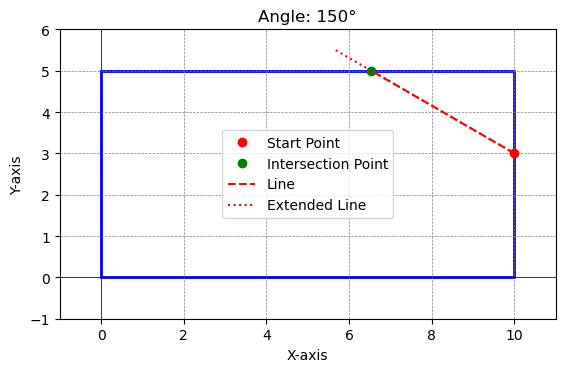

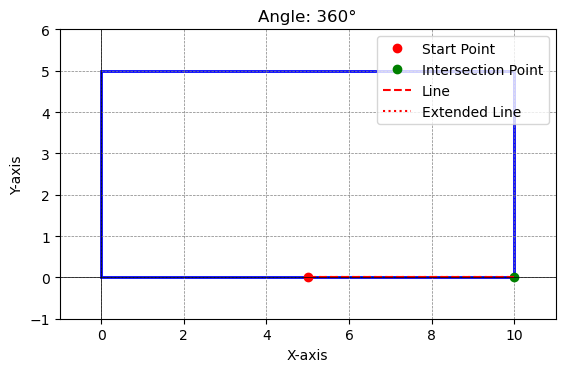

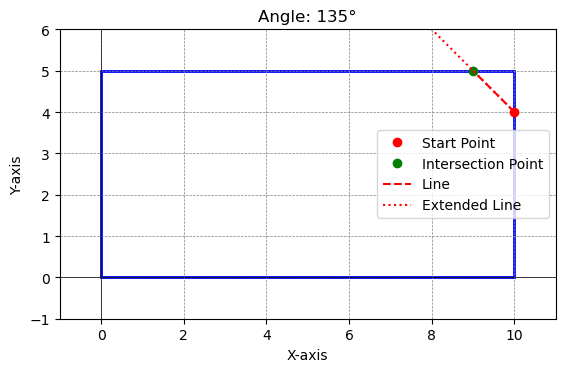

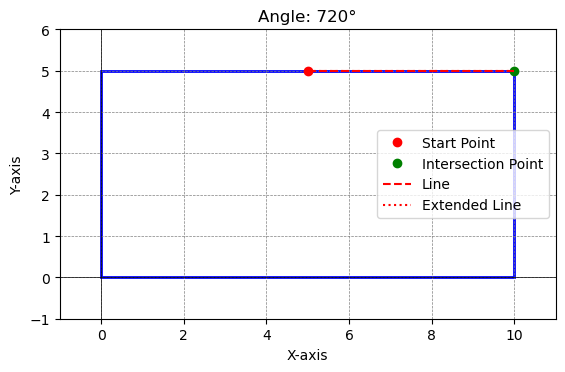

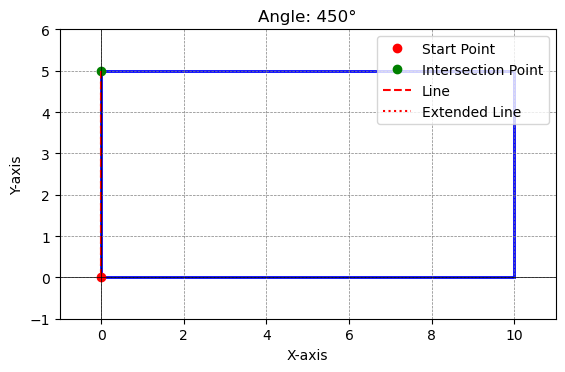

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_angle(angle):
    """ Normalize the angle to be within the range [0, 360). """
    return angle % 360

def intersect_rectangle(L, W, start_point, angle):
    x0, y0 = start_point
    angle = normalize_angle(angle)
    theta_radians = np.radians(angle)

    # Calculate direction vectors for the angle and its reflection (180 - angle)
    directions = [(np.cos(theta_radians), np.sin(theta_radians)),
                  (np.cos(theta_radians + np.pi), np.sin(theta_radians + np.pi))]

    intersections = []

    for delta_x, delta_y in directions:
        # Intersect with the left side (x = 0)
        if delta_x != 0:
            t_left = -x0 / delta_x
            if t_left >= 0:
                y_left = y0 + t_left * delta_y
                if 0 <= y_left <= W and (0, y_left) != start_point:
                    intersections.append((0, y_left))

        # Intersect with the right side (x = L)
        if delta_x != 0:
            t_right = (L - x0) / delta_x
            if t_right >= 0:
                y_right = y0 + t_right * delta_y
                if 0 <= y_right <= W and (L, y_right) != start_point:
                    intersections.append((L, y_right))

        # Intersect with the bottom side (y = 0)
        if delta_y != 0:
            t_bottom = -y0 / delta_y
            if t_bottom >= 0:
                x_bottom = x0 + t_bottom * delta_x
                if 0 <= x_bottom <= L and (x_bottom, 0) != start_point:
                    intersections.append((x_bottom, 0))

        # Intersect with the top side (y = W)
        if delta_y != 0:
            t_top = (W - y0) / delta_y
            if t_top >= 0:
                x_top = x0 + t_top * delta_x
                if 0 <= x_top <= L and (x_top, W) != start_point:
                    intersections.append((x_top, W))

    # Return the first intersection found (or None if there are none)
    return intersections[0] if intersections else None

def plot_rectangle_and_line(L, W, start_point, angle):
    intersection = intersect_rectangle(L, W, start_point, angle)

    # Create figure and axis
    fig, ax = plt.subplots()

    # Draw rectangle
    rectangle = plt.Rectangle((0, 0), L, W, fill=None, edgecolor='blue', linewidth=2)
    ax.add_patch(rectangle)

    # Plot start point
    ax.plot(start_point[0], start_point[1], 'ro', label='Start Point')

    # Plot intersection point
    if intersection:
        ax.plot(intersection[0], intersection[1], 'go', label='Intersection Point')

        # Draw line from start point to intersection point
        ax.plot([start_point[0], intersection[0]], [start_point[1], intersection[1]], 'r--', label='Line')

    # Extend line visualization for angle direction
    delta_x = np.cos(np.radians(angle))
    delta_y = np.sin(np.radians(angle))
    line_extension = 5  # Length of the extended line
    line_x = [start_point[0], start_point[0] + delta_x * line_extension]
    line_y = [start_point[1], start_point[1] + delta_y * line_extension]
    ax.plot(line_x, line_y, 'r:', label='Extended Line')

    # Configure plot limits and labels
    ax.set_xlim(-1, L + 1)
    ax.set_ylim(-1, W + 1)
    ax.set_aspect('equal', adjustable='box')
    ax.axhline(0, color='black', lw=0.5)
    ax.axvline(0, color='black', lw=0.5)
    ax.grid(color='gray', linestyle='--', linewidth=0.5)
    ax.set_title(f'Angle: {angle}°')
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()

    plt.show()

# Example scenarios with angles that wrap around
examples = [
    (10, 5, (0, 2), 30),     # Normal angle
    (10, 5, (10, 3), 150),   # Normal angle
    (10, 5, (5, 0), 360),    # 360 degrees (same direction as 0)
    (10, 5, (10, 4), 135),   # Negative angle
    (10, 5, (5, 5), 720),    # 720 degrees (full rotation)
    (10, 5, (0, 0), 450),    # 450 degrees
]

for L, W, start_point, angle in examples:
    plot_rectangle_and_line(L, W, start_point, angle)


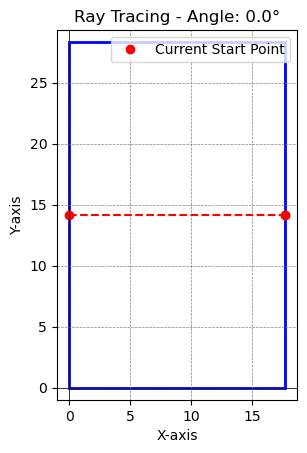

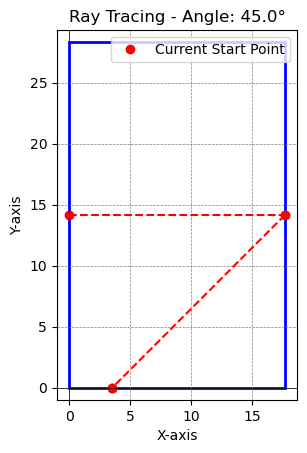

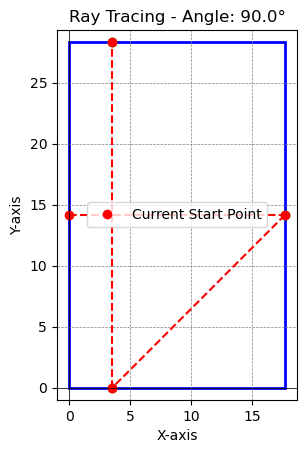

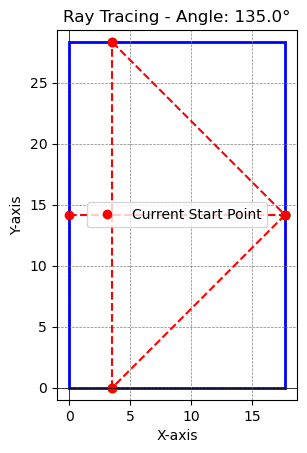

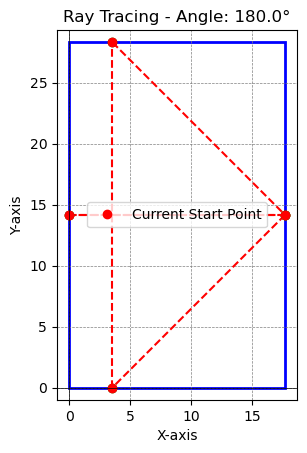

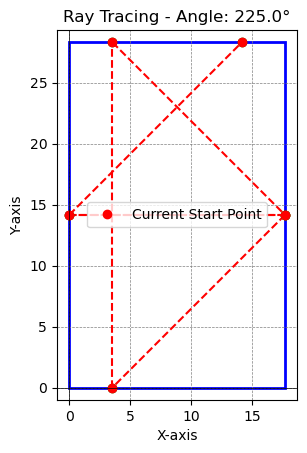

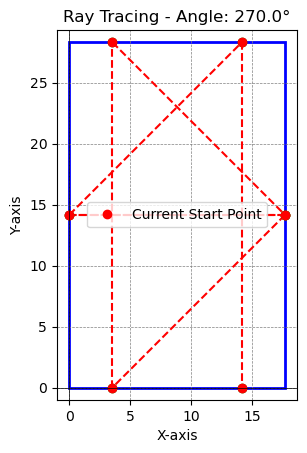

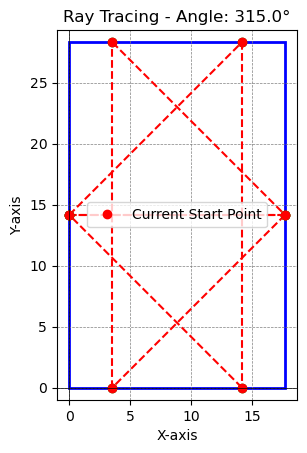

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_angle(angle):
    """ Normalize the angle to be within the range [0, 360). """
    return angle % 360

def intersect_rectangle(L, W, start_point, angle):
    x0, y0 = start_point
    angle = normalize_angle(angle)
    theta_radians = np.radians(angle)

    # Calculate direction vectors for the angle and its reflection (180 - angle)
    directions = [(np.cos(theta_radians), np.sin(theta_radians)),
                  (np.cos(theta_radians + np.pi), np.sin(theta_radians + np.pi))]

    intersections = []

    for delta_x, delta_y in directions:
        # Intersect with the left side (x = 0)
        if delta_x != 0:
            t_left = -x0 / delta_x
            if t_left >= 0:
                y_left = y0 + t_left * delta_y
                if 0 <= y_left <= W and (0, y_left) != start_point:
                    intersections.append((0, y_left))

        # Intersect with the right side (x = L)
        if delta_x != 0:
            t_right = (L - x0) / delta_x
            if t_right >= 0:
                y_right = y0 + t_right * delta_y
                if 0 <= y_right <= W and (L, y_right) != start_point:
                    intersections.append((L, y_right))

        # Intersect with the bottom side (y = 0)
        if delta_y != 0:
            t_bottom = -y0 / delta_y
            if t_bottom >= 0:
                x_bottom = x0 + t_bottom * delta_x
                if 0 <= x_bottom <= L and (x_bottom, 0) != start_point:
                    intersections.append((x_bottom, 0))

        # Intersect with the top side (y = W)
        if delta_y != 0:
            t_top = (W - y0) / delta_y
            if t_top >= 0:
                x_top = x0 + t_top * delta_x
                if 0 <= x_top <= L and (x_top, W) != start_point:
                    intersections.append((x_top, W))

    # Return the first intersection found (or None if there are none)
    return intersections[0] if intersections else None

def plot_lines_up_to_angle(L, W, start_point, angles):
    current_point = start_point
    all_intersections = []

    for angle in angles:
        intersection = intersect_rectangle(L, W, current_point, angle)
        if intersection:
            all_intersections.append((current_point, intersection))
            current_point = intersection

            # Create a new figure for the current angle
            fig, ax = plt.subplots()

            # Draw rectangle
            rectangle = plt.Rectangle((0, 0), L, W, fill=None, edgecolor='blue', linewidth=2)
            ax.add_patch(rectangle)

            # Plot all previous lines and intersections
            for start, end in all_intersections:
                ax.plot([start[0], end[0]], [start[1], end[1]], 'r--')  # Lines
                ax.plot(start[0], start[1], 'ro')  # Start points
                ax.plot(end[0], end[1], 'go')  # End points

            # Mark the current start point
            ax.plot(current_point[0], current_point[1], 'ro', label='Current Start Point')

            # Configure plot limits and labels
            ax.set_xlim(-1, L + 1)
            ax.set_ylim(-1, W + 1)
            ax.set_aspect('equal', adjustable='box')
            ax.axhline(0, color='black', lw=0.5)
            ax.axvline(0, color='black', lw=0.5)
            ax.grid(color='gray', linestyle='--', linewidth=0.5)
            ax.set_title(f'Ray Tracing - Angle: {angle}°')
            ax.set_xlabel('X-axis')
            ax.set_ylabel('Y-axis')
            ax.legend()

            plt.show()  # Show the current plot

# Set parameters for the rectangle and starting point
L = 17.69  # Length of the rectangle
W =  28.3 
# Width of the rectangle
start_point = (0,W/2)  # Starting point
n = 8
angles = [i * (360 / n) for i in range(n)]  # List of angles

# Plot with the initial parameters
plot_lines_up_to_angle(L, W, start_point, angles)


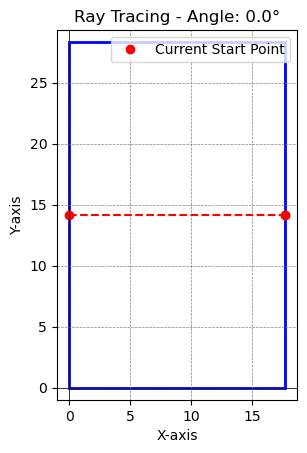

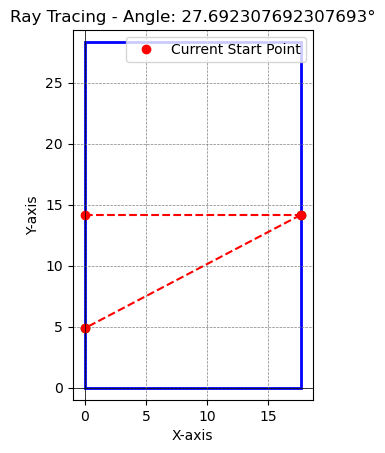

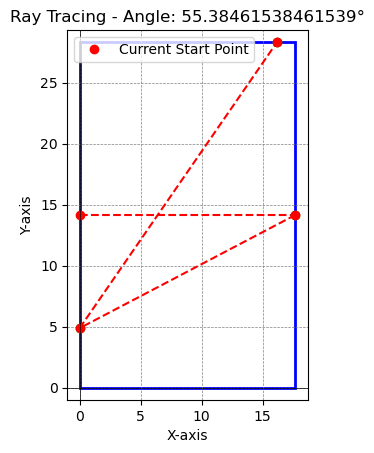

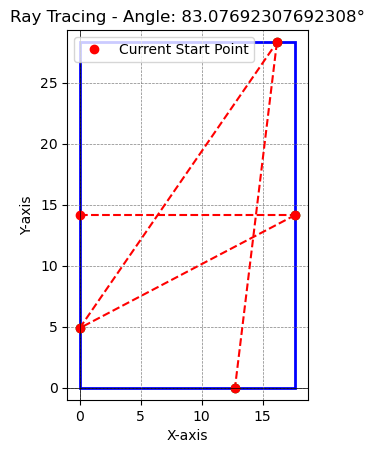

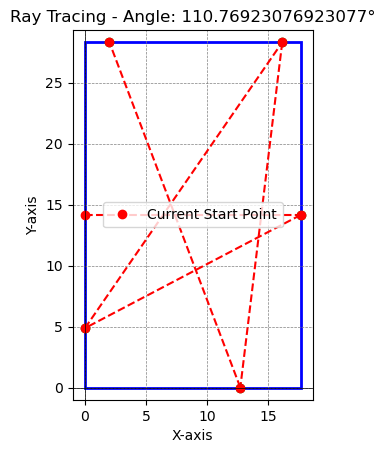

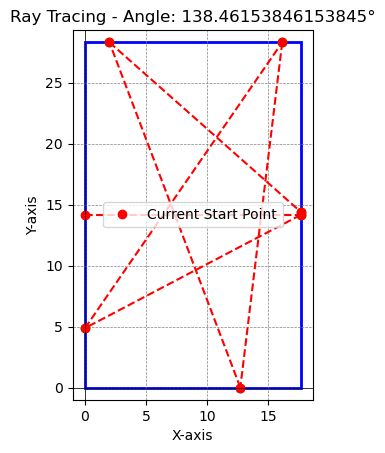

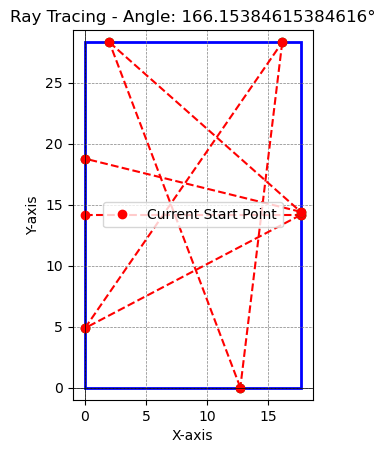

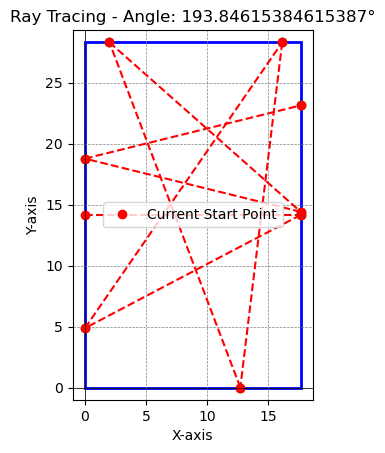

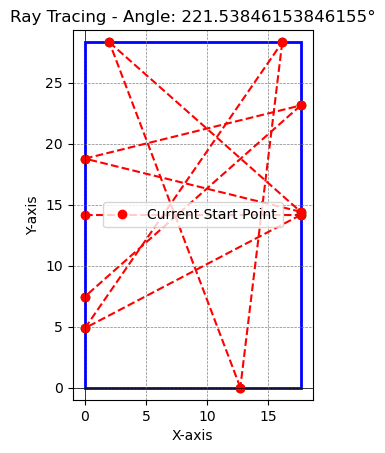

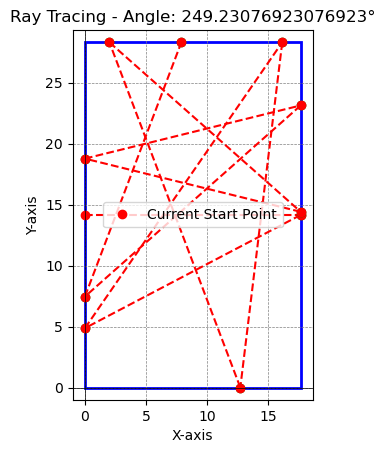

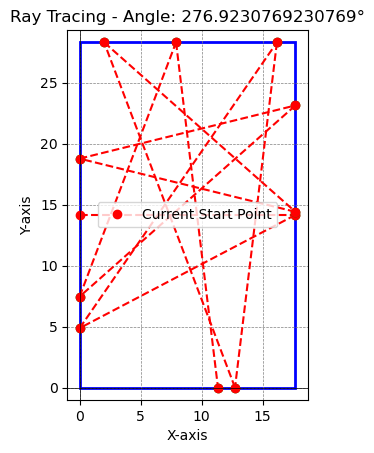

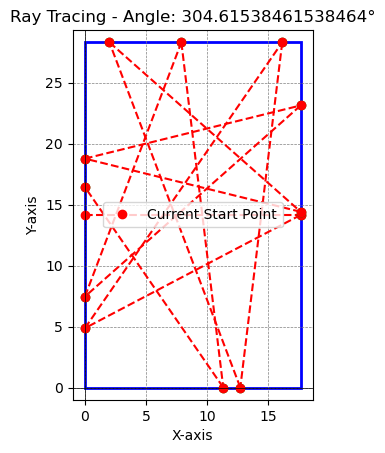

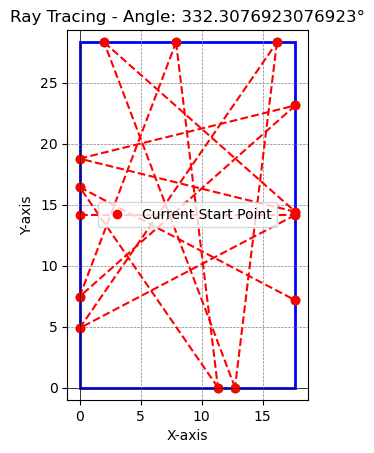

In [3]:
L = 17.69  # Length of the rectangle
W =  28.3 
# Width of the rectangle
start_point = (0,W/2)  # Starting point
n = 13
angles = [i * (360 / n) for i in range(n)]  # List of angles

# Plot with the initial parameters
plot_lines_up_to_angle(L, W, start_point, angles)

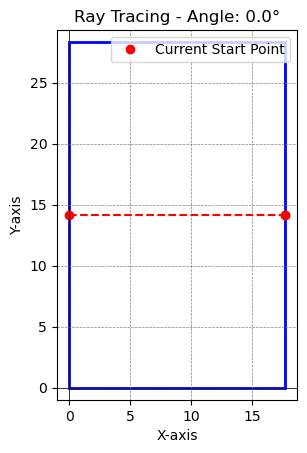

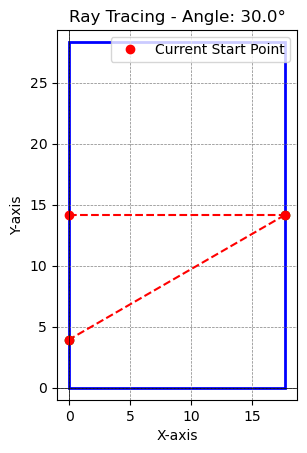

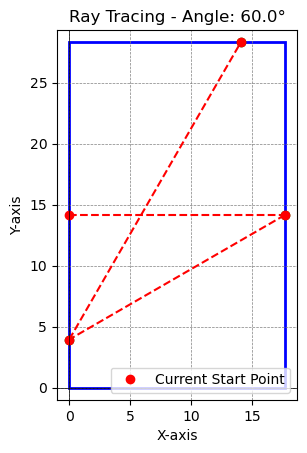

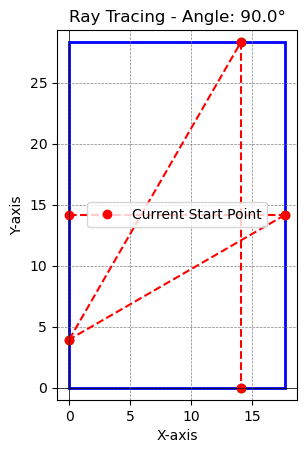

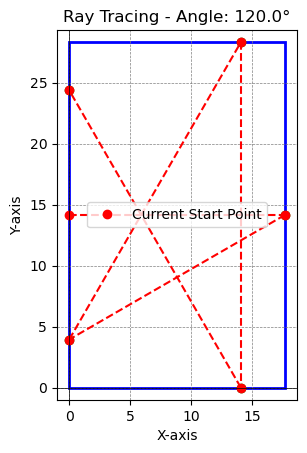

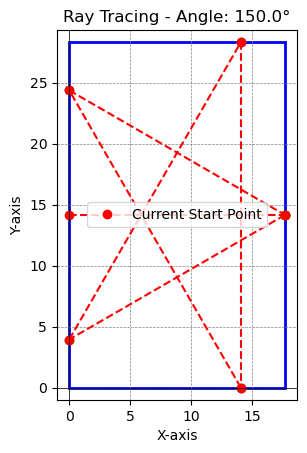

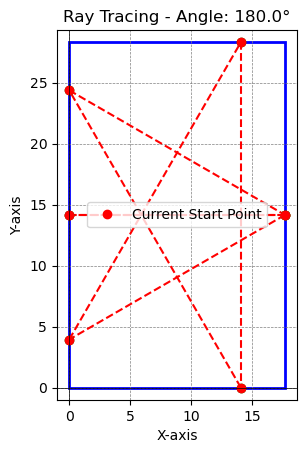

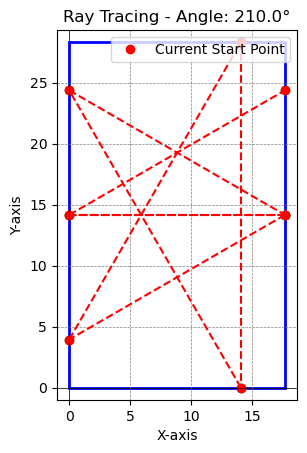

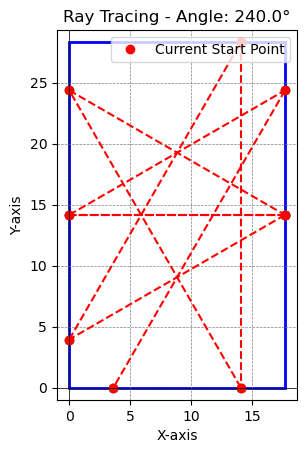

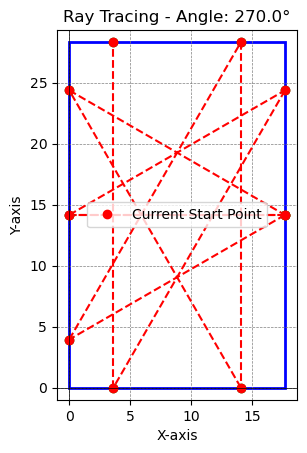

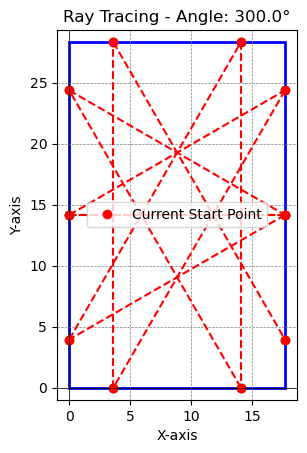

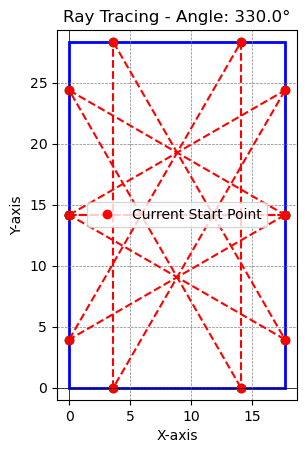

In [9]:
L = 17.69  # Length of the rectangle
W =  28.3 
# Width of the rectangle
start_point = (0,W/2)  # Starting point
n = 12
angles = [i * (360 / n) for i in range(n)]  # List of angles

# Plot with the initial parameters
plot_lines_up_to_angle(L, W, start_point, angles)